In [44]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="white",palette='husl')
import matplotlib.pyplot as plt

## Load in meta data

In [3]:
data_dir = 'D:\\ninavv\\phd\\data\\NIH\\'
metadata = pd.read_csv(data_dir+'Data_Entry_2017_v2020.csv')

In [4]:
metadata.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


## Orgnize the labels

In [10]:
disease_labels_raw = set(metadata['Finding Labels'].to_list())

disease_labels = []
for each in disease_labels_raw:
    info = each.split('|')
    for each_info in info:
        if each_info not in disease_labels:
            disease_labels.append(each_info)
            
            
print('Number of disease labels:{}\nList of the labels:{}'.format(len(disease_labels),disease_labels))

Number of disease labels:15
List of the labels:['Effusion', 'Emphysema', 'Nodule', 'Atelectasis', 'Infiltration', 'Mass', 'Pleural_Thickening', 'Pneumothorax', 'Consolidation', 'Fibrosis', 'Cardiomegaly', 'Pneumonia', 'Edema', 'Hernia', 'No Finding']


Add binary columns to each labels:

In [11]:
for each_label in disease_labels:
    metadata[each_label] = metadata['Finding Labels'].apply(lambda x: 1 if each_label in x else 0)
metadata.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Mass,Pleural_Thickening,Pneumothorax,Consolidation,Fibrosis,Cardiomegaly,Pneumonia,Edema,Hernia,No Finding
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,0,0,1,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,1,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,1
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,1,0


## Load in split information

In [18]:
train_val_txt = open(data_dir+'train_val_list.txt','r')
test_txt = open(data_dir+'test_list.txt','r')

train_val_list = train_val_txt.read().split('\n')
test_list = test_txt.read().split('\n')

Split:

In [19]:
metadata['split'] = metadata['Image Index'].apply(lambda x: 'test' if x in test_list else 'train')

In [20]:
metadata.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pleural_Thickening,Pneumothorax,Consolidation,Fibrosis,Cardiomegaly,Pneumonia,Edema,Hernia,No Finding,split
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,0,1,0,0,0,0,train
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,1,0,0,0,0,train
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,1,0,0,0,0,train
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,1,train
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,1,0,test


Split train and valid:

In [83]:
valid_perc = 0.2

valid_index = metadata[metadata['split']=='train'].sample(frac=valid_perc,axis=0).index.to_list()

In [89]:
for each in valid_index:
    metadata.loc[each, 'split'] = 'valid'

## Exam the gender balance in train/valid/test set

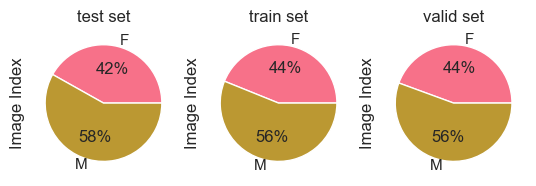

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3)
testset = metadata[metadata['split']=='test']
trainset = metadata[metadata['split']=='train']
validset = metadata[metadata['split']=='valid']

testset.groupby(['Patient Gender']).count()['Image Index'].plot(kind='pie',autopct='%1.0f%%',ax=axes[0])
trainset.groupby(['Patient Gender']).count()['Image Index'].plot(kind='pie',autopct='%1.0f%%',ax=axes[1])
validset.groupby(['Patient Gender']).count()['Image Index'].plot(kind='pie',autopct='%1.0f%%',ax=axes[2])

axes[0].title.set_text('test set')
axes[1].title.set_text('train set')
axes[2].title.set_text('valid set')
plt.show()

## Exam the disease label balance in train/valid/test set

In [95]:
for each_dis in disease_labels:
    testset = metadata[metadata['split']=='test']
    trainset = metadata[metadata['split']=='train']
    validset = metadata[metadata['split']=='valid']
    
    test_=testset.groupby([each_dis]).count()['Image Index']
    test_ /= test_.sum()
    
    train_=trainset.groupby([each_dis]).count()['Image Index']
    train_ /= train_.sum()
    
    valid_=validset.groupby([each_dis]).count()['Image Index']
    valid_ /= valid_.sum()
    
    trainset.groupby([each_dis]).count()['Image Index']
    print('\n'+each_dis)
    print('Train: 1 - {:.2f}%, 0 - {:.2f}%'.format(train_[1]*100,train_[0]*100))
    print('Valid: 1 - {:.2f}%, 0 - {:.2f}%'.format(valid_[1]*100,valid_[0]*100))
    print('Test: 1 - {:.2f}%, 0 - {:.2f}%'.format(test_[1]*100,test_[0]*100))
   




Effusion
Train: 1 - 9.97%, 0 - 90.03%
Valid: 1 - 10.17%, 0 - 89.83%
Test: 1 - 18.20%, 0 - 81.80%

Emphysema
Train: 1 - 1.67%, 0 - 98.33%
Valid: 1 - 1.53%, 0 - 98.47%
Test: 1 - 4.27%, 0 - 95.73%

Nodule
Train: 1 - 5.41%, 0 - 94.59%
Valid: 1 - 5.56%, 0 - 94.44%
Test: 1 - 6.34%, 0 - 93.66%

Atelectasis
Train: 1 - 9.54%, 0 - 90.46%
Valid: 1 - 9.68%, 0 - 90.32%
Test: 1 - 12.81%, 0 - 87.19%

Infiltration
Train: 1 - 15.90%, 0 - 84.10%
Valid: 1 - 16.04%, 0 - 83.96%
Test: 1 - 23.88%, 0 - 76.12%

Mass
Train: 1 - 4.69%, 0 - 95.31%
Valid: 1 - 4.56%, 0 - 95.44%
Test: 1 - 6.83%, 0 - 93.17%

Pleural_Thickening
Train: 1 - 2.60%, 0 - 97.40%
Valid: 1 - 2.57%, 0 - 97.43%
Test: 1 - 4.47%, 0 - 95.53%

Pneumothorax
Train: 1 - 3.02%, 0 - 96.98%
Valid: 1 - 3.17%, 0 - 96.83%
Test: 1 - 10.41%, 0 - 89.59%

Consolidation
Train: 1 - 3.35%, 0 - 96.65%
Valid: 1 - 3.07%, 0 - 96.93%
Test: 1 - 7.09%, 0 - 92.91%

Fibrosis
Train: 1 - 1.48%, 0 - 98.52%
Valid: 1 - 1.31%, 0 - 98.69%
Test: 1 - 1.70%, 0 - 98.30%

Cardiomegal

## Save the file

In [97]:
metadata.to_csv(data_dir+'Data_Entry_2017_v2020_clean_split.csv')

*Fake csv file*

In [102]:
metadata.head(15)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pleural_Thickening,Pneumothorax,Consolidation,Fibrosis,Cardiomegaly,Pneumonia,Edema,Hernia,No Finding,split
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,0,1,0,0,0,0,train
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,1,0,0,0,0,train
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,1,0,0,0,0,valid
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,1,train
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,1,0,test
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,1,0,test
6,00000003_003.png,Hernia|Infiltration,2,3,76,F,PA,2698,2991,0.143,...,0,0,0,0,0,0,0,1,0,test
7,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,1,0,test
8,00000003_005.png,Hernia,4,3,78,F,PA,2686,2991,0.143,...,0,0,0,0,0,0,0,1,0,test
9,00000003_006.png,Hernia,5,3,79,F,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,1,0,test


In [103]:
fake_data = metadata.iloc[:15,:]

In [105]:
fake_data.to_csv(data_dir+'Data_Entry_2017_v2020_clean_split_fake.csv')